In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTEN
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('C:/Users/HCJ/Desktop/2021_Summer/Finance_data/bank.csv',index_col=0)
print(data.shape)

(119535, 93)


In [4]:
for col_name in data.columns:
    data[col_name]=pd.Categorical(data[col_name])

In [5]:
train_data, test_data = train_test_split(data,test_size=0.2, random_state=100)
print(train_data.shape)
print(test_data.shape)

(95628, 93)
(23907, 93)


In [6]:
X_train = train_data.iloc[:,1:]
y_train = train_data['TARGET']
X_test = test_data.iloc[:,1:]
y_test = test_data['TARGET']

In [7]:
smoten = SMOTEN()
X_train_samp, y_train_samp = smoten.fit_resample(X_train,y_train)

In [8]:
def get_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    precision2=precision_score(y_test,pred,pos_label=0)
    recall2=recall_score(y_test,pred,pos_label=0)
    f1_2=f1_score(y_test,pred,pos_label=0)
    print("confusion matrix")
    print(confusion)
    print('accuracy : {0:.4f} , precision : {1:.4f} , recall : {2:.4f}, F1 score : {3:.4f} \n precision(0) : {4:.4f} , recall(0) : {5:.4f}, f1(0) : {6:.4f}'.format(accuracy,precision, recall,f1,precision2,recall2,f1_2))
    
def precision_recall_curve_plot(y_test, pred_proba_cl):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_cl)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label = 'ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()

# 사이킷런을 이용한 MLP 모델 

In [10]:
# 샘플링 없을 때
scaler = StandardScaler()   # 객체 만들기
scaler.fit(X_train)     # 변환 규칙을 익히기
x_train_scaled = scaler.transform(X_train)  # 데이터를 표준화 전처리
 
mlp0 = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd', alpha=0.01, batch_size=32,learning_rate_init=0.1, max_iter=500)  # 객체 생성
 
mlp0.fit(x_train_scaled, y_train)    # 훈련하기
pred0 = mlp0.predict(X_test)
get_eval(y_test,pred0)      # 정확도 평가

confusion matrix
[[23751     0]
 [  156     0]]
accuracy : 0.9935 , precision : 0.0000 , recall : 0.0000, F1 score : 0.0000 
 precision(0) : 0.9935 , recall(0) : 1.0000, f1(0) : 0.9967


C:\Users\HCJ\anaconda3\envs\HCJ\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# 샘플링 없을 때
scaler = StandardScaler()   # 객체 만들기
scaler.fit(X_train)     # 변환 규칙을 익히기
x_train_samp_scaled = scaler.transform(X_train_samp)  # 데이터를 표준화 전처리

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd', alpha=0.01, batch_size=32,learning_rate_init=0.1, max_iter=500)  # 객체 생성
 
mlp.fit(x_train_samp_scaled, y_train_samp)    # 훈련하기
pred = mlp.predict(X_test)
get_eval(y_test,pred)      # 정확도 평가

confusion matrix
[[22570  1181]
 [  137    19]]
accuracy : 0.9449 , precision : 0.0158 , recall : 0.1218, F1 score : 0.0280 
 precision(0) : 0.9940 , recall(0) : 0.9503, f1(0) : 0.9716


In [12]:
# ReLU activation function을 이용 
mlp1 = MLPClassifier(activation='relu')  # 객체 생성
 
mlp1.fit(x_train_samp_scaled, y_train_samp)    # 훈련하기
pred1 = mlp1.predict(X_test)
get_eval(y_test,pred1)      # 정확도 평가

confusion matrix
[[17829  5922]
 [   94    62]]
accuracy : 0.7484 , precision : 0.0104 , recall : 0.3974, F1 score : 0.0202 
 precision(0) : 0.9948 , recall(0) : 0.7507, f1(0) : 0.8556


In [13]:
mlp2 = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', alpha=0.01, batch_size=32,learning_rate_init=0.1, max_iter=500)  # 객체 생성
 
mlp2.fit(x_train_samp_scaled, y_train_samp)    # 훈련하기
pred2 = mlp2.predict(X_test)
get_eval(y_test,pred2)      # 정확도 평가

confusion matrix
[[ 8806 14945]
 [   26   130]]
accuracy : 0.3738 , precision : 0.0086 , recall : 0.8333, F1 score : 0.0171 
 precision(0) : 0.9971 , recall(0) : 0.3708, f1(0) : 0.5405


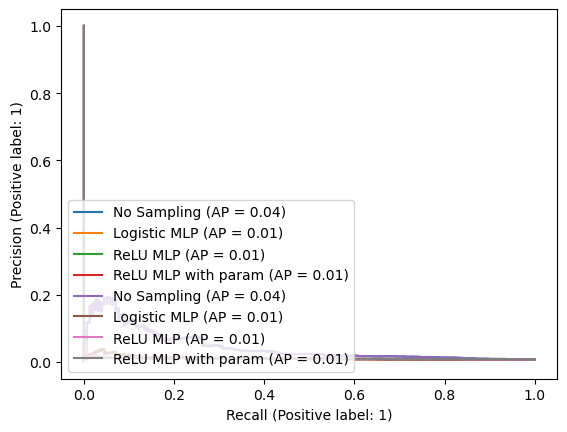

In [15]:
plot_precision_recall_curve(mlp0, X_test, y_test, ax = plt.gca(), name = "No Sampling")
plot_precision_recall_curve(mlp, X_test, y_test, ax = plt.gca(), name = "Logistic MLP")
plot_precision_recall_curve(mlp1, X_test, y_test,ax = plt.gca(),name = "ReLU MLP")
plot_precision_recall_curve(mlp2, X_test, y_test, ax = plt.gca(), name = "ReLU MLP with param")

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_cv = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose = 2)
grid_cv.fit(x_train_samp_scaled, y_train_samp)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))